In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rawdata = pd.read_csv('dataset.dat')
title_text = "US Public Opinion of Vote By Mail"

x_str='Demographic'
y0_str = 'The US should allow all voters to vote by mail in elections this year to minimize the spread of the coronavirus'
y1_str = 'The US should not allow all voters to vote by mail in elections this year because it jeopardizes election security'
y2_str = 'Don\'t Know or No Opinion'

In [3]:
# Give us a more usable interface than the exact question wording

data = rawdata.rename(columns={x_str:'group', y0_str:'support', y1_str:'oppose', y2_str:'none'})
data

,group,support,oppose,none
0,Registered voters,58,31,11
1,Dem no Lean,81,10,8
2,Ind no Lean,57,27,17
3,Rep no Lean,33,57,11


In [4]:
sns.set()

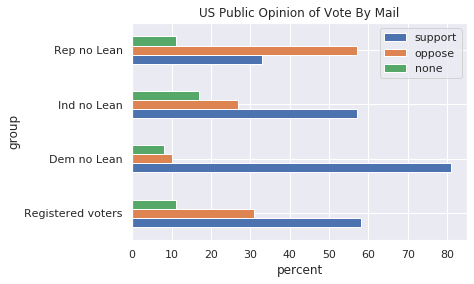

In [5]:
data.plot(kind='barh',
          x='group',
          y=['support','oppose','none'],
          legend='upper right')
plt.xlabel('percent')
plt.title(title_text)
plt.show()

<Figure size 432x288 with 0 Axes>

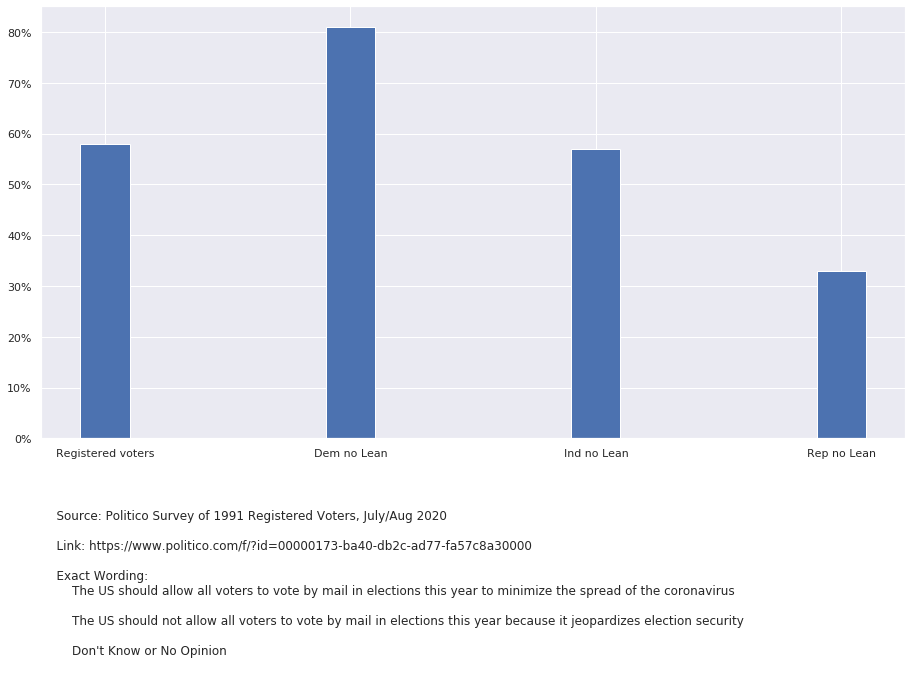

In [17]:
import matplotlib.ticker as mtick

fig = plt.figure()

x = data['group']
y = data['support']
y2 = data['oppose']

txt = '''
    Source: Politico Survey of 1991 Registered Voters, July/Aug 2020
    
    Link: https://www.politico.com/f/?id=00000173-ba40-db2c-ad77-fa57c8a30000
    
    Exact Wording:
        ''' + y0_str + '\n' + '''
        ''' + y1_str + '\n' + '''
        ''' + y2_str + '\n'

fig = plt.figure()
fig.ylim=((0,100))
ax = fig.add_axes((.1,.4,2,1.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.bar(x,y,.2)
fig.text(.1,-0.4,txt)
plt.show()